In [1]:
import ROOT
ROOT.enableJSVis()   # enable JSROOT visualisation
from IPython.display import Image

In [2]:
# find the peak position and the 50% left
def find_peak_and_halfmax_left(hist):
    peak = hist.GetMaximumBin()
    peak_pos = hist.GetBinCenter(peak)
    half_max = hist.GetMaximum() / 2
    for i in range(peak, 0, -1):
        if hist.GetBinContent(i) < half_max:
            left_50 = hist.GetBinCenter(i)
            return peak_pos, left_50
    return peak_pos, hist.GetBinLowEdge(1)

convolute landau with exponential

In [3]:
def toyMC(tlandau):
    ROOT.gRandom.SetSeed(0)
    xmin = -20
    xmax = 20
    if tlandau < 1.0:
        xmin = -2
        xmax = 5
    htruth_Sci = ROOT.TH1F("htruth_Sci", "Truth Distribution;Time[ns];Counts", 500, xmin, xmax)
    htruth_Cer = ROOT.TH1F("htruth_Cer", "Truth Distribution;Time[ns];Counts", 500, xmin, xmax)


    suffix = f"_landau{tlandau}"
    hconvoluted_Sci = ROOT.TH1F(f"hconvoluted_Sci{suffix}", "Convoluted Distribution;Time[ns];Counts", 500, xmin, xmax)
    hconvoluted_Cer = ROOT.TH1F(f"hconvoluted_Cer{suffix}", "Convoluted Distribution;Time[ns];Counts", 500, xmin, xmax)
    for i in range(int(1e6)):
        tSci = ROOT.gRandom.Exp(3.0)
        tCer = 0.
        # Convolute Landau with Exponential
        #convoluted = flandau.GetRandom() + t
        #convoluted = flandau.Eval(t)
        response_Sci = ROOT.gRandom.Landau(tSci, tlandau)
        response_Cer = ROOT.gRandom.Landau(tCer, tlandau)
        htruth_Sci.Fill(tSci)
        htruth_Cer.Fill(tCer)
        hconvoluted_Sci.Fill(response_Sci)
        hconvoluted_Cer.Fill(response_Cer)


    peak_Sci, left_50_Sci = find_peak_and_halfmax_left(hconvoluted_Sci)
    peak_Cer, left_50_Cer = find_peak_and_halfmax_left(hconvoluted_Cer)

    print(f"Sci: Peak at {peak_Sci:.2f}, 50% left at {left_50_Sci:.2f} ns")
    print(f"Cer: Peak at {peak_Cer:.2f}, 50% left at {left_50_Cer:.2f} ns")
    
    canv = ROOT.TCanvas(f"c{suffix}", f"Convoluted Distribution {suffix}", 800, 600)
    canv.cd()
    hconvoluted_Sci.SetLineColor(ROOT.kBlue)
    hconvoluted_Cer.SetLineColor(ROOT.kRed)
    hconvoluted_Cer.Draw()
    hconvoluted_Sci.Draw("same")
    hconvoluted_Cer.Draw("SAME")
    
    htruth_Cer.SetLineColor(ROOT.kRed)
    htruth_Cer.SetLineStyle(2)
    htruth_Sci.SetLineColor(ROOT.kBlue)
    htruth_Sci.SetLineStyle(2)
    htruth_Cer.Draw("same")
    htruth_Sci.Draw("same")
    
    tpave1 = ROOT.TPaveText(0.6, 0.80, 0.9, 0.85, "NDC")
    tpave1.SetFillColor(0)
    tpave1.SetBorderSize(0)
    tpave1.SetTextAlign(11)
    tpave1.SetTextFont(42)
    tpave1.SetTextSize(0.03)
    tpave1.AddText(f"Landau #tau = {tlandau} ns")

    tpave2 = ROOT.TPaveText(0.6, 0.70, 0.9, 0.80, "NDC")
    tpave2.SetFillColor(0)
    tpave2.SetBorderSize(0)
    tpave2.SetTextAlign(11)
    tpave2.SetTextFont(42)
    tpave2.SetTextSize(0.03)
    tpave2.SetTextColor(ROOT.kBlue)
    tpave2.AddText(f"Sci: Peak at {peak_Sci:.2f} ns")
    tpave2.AddText(f"Sci 50% Peak at {left_50_Sci:.2f} ns")

    tpave3 = ROOT.TPaveText(0.6, 0.60, 0.9, 0.70, "NDC")
    tpave3.SetFillColor(0)
    tpave3.SetBorderSize(0)
    tpave3.SetTextAlign(11)
    tpave3.SetTextFont(42)
    tpave3.SetTextSize(0.03)
    tpave3.SetTextColor(ROOT.kRed)
    tpave3.AddText(f"Cer: Peak at {peak_Cer:.2f} ns")
    tpave3.AddText(f"Cer 50% Peak at {left_50_Cer:.2f} ns")

    tpave1.Draw("SAME")
    tpave2.Draw("SAME")
    tpave3.Draw("SAME")
    
    canv.Draw()
    outputname = f"toyMC{suffix}.png"
    canv.SaveAs(outputname)
    return outputname

Sci: Peak at 0.74, 50% left at 0.04 ns
Cer: Peak at -0.02, 50% left at -0.16 ns


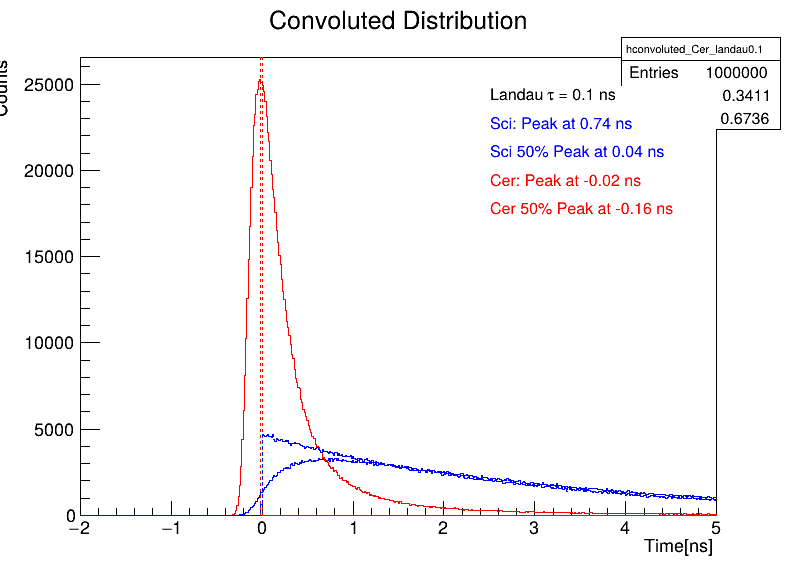

Info in <TCanvas::Print>: png file toyMC_landau0.1.png has been created


In [4]:
img = toyMC(0.1)
Image(img)

Sci: Peak at 0.91, 50% left at 0.04 ns
Cer: Peak at -0.07, 50% left at -0.48 ns


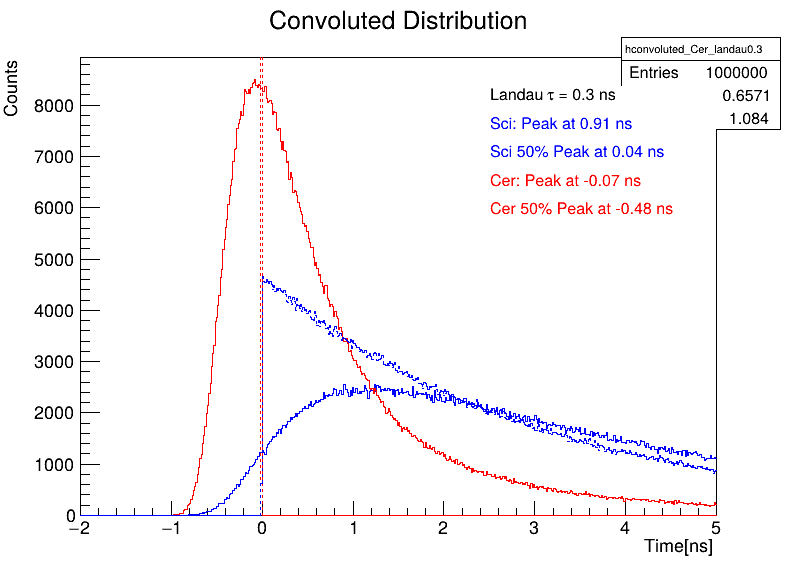

Info in <TCanvas::Print>: png file toyMC_landau0.3.png has been created


In [5]:
img = toyMC(0.3)
Image(img)

Sci: Peak at 1.93, 50% left at -0.02 ns
Cer: Peak at -0.05, 50% left at -0.79 ns


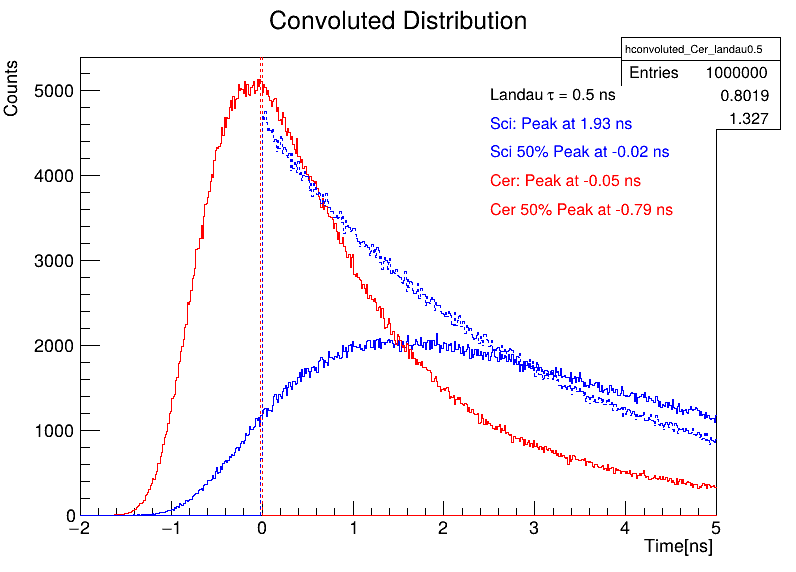

Info in <TCanvas::Print>: png file toyMC_landau0.5.png has been created


In [6]:
img = toyMC(0.5)
Image(img)

Sci: Peak at 2.04, 50% left at -0.52 ns
Cer: Peak at -0.36, 50% left at -1.64 ns


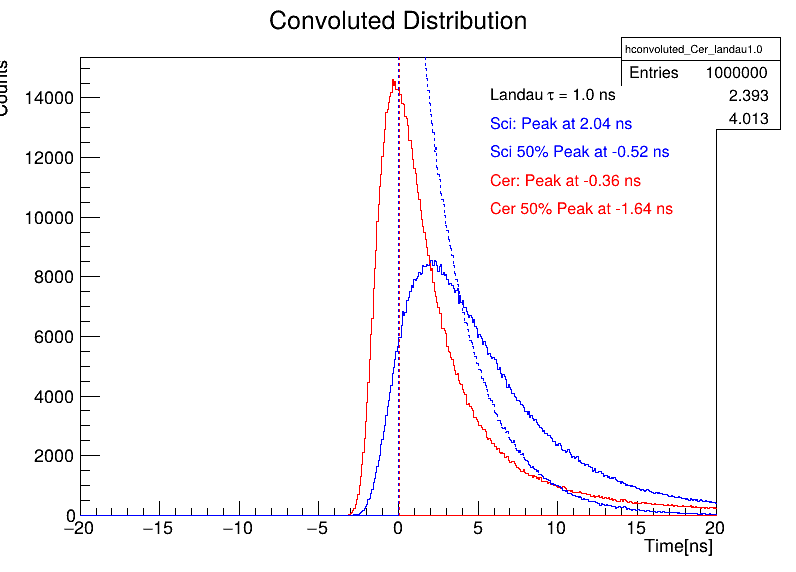

Info in <TCanvas::Print>: png file toyMC_landau1.0.png has been created


In [7]:
img = toyMC(1.0)
Image(img)

Sci: Peak at 2.84, 50% left at -2.84 ns
Cer: Peak at 0.04, 50% left at -4.76 ns


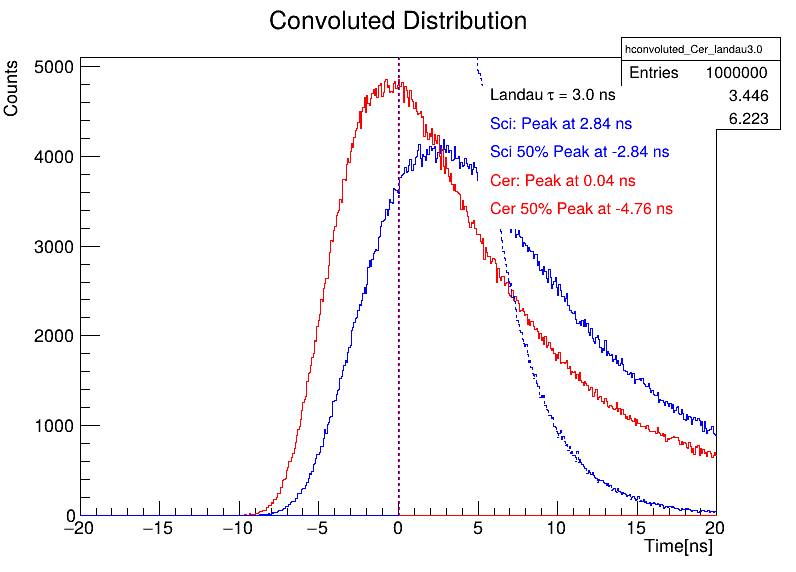

Info in <TCanvas::Print>: png file toyMC_landau3.0.png has been created


In [8]:
img = toyMC(3.0)
Image(img)

Sci: Peak at 1.40, 50% left at -5.48 ns
Cer: Peak at -2.20, 50% left at -7.96 ns


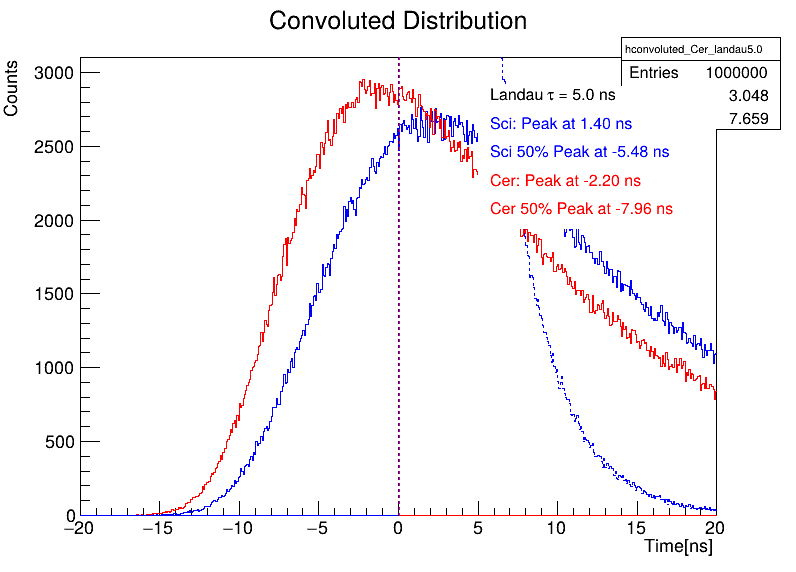

Info in <TCanvas::Print>: png file toyMC_landau5.0.png has been created


In [9]:
img = toyMC(5.0)
Image(img)

Sci: Peak at 1.48, 50% left at -12.28 ns
Cer: Peak at -0.68, 50% left at -15.32 ns


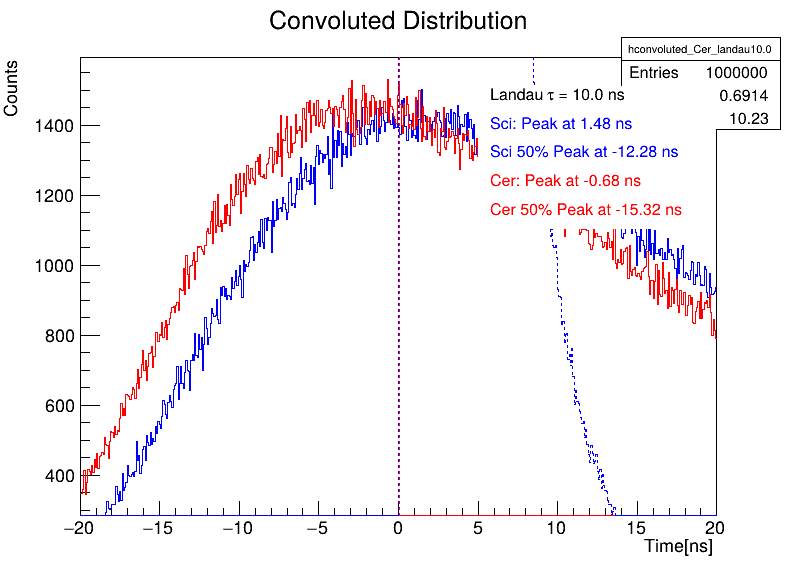

Info in <TCanvas::Print>: png file toyMC_landau10.0.png has been created


In [10]:
img = toyMC(10.0)
Image(img)